In [107]:
# importing all the packages and naming them as per our convinience.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
import warnings
warnings.filterwarnings('ignore')

In [108]:
"""A cloth manufacturing company is interested to know about the segment or attributes causes high sale."""
"""Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis"""

'Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis'

In [109]:
# Load the dataset using pandas
data = pd.read_csv("E:\\Decision Trees\\Company_Data.csv")
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [110]:
# creating a dataframe using pandas.
df=pd.DataFrame(data)
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [111]:
# info function gives us the raw information of data such as any null values, data types e.t.c.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [112]:
# as the data contains many categorical variables we have to convert them into int64 datatypes using the labelencoder
encoder = LabelEncoder()

In [113]:
# label encoding the object data types
df['ShelveLoc']=encoder.fit_transform(df['ShelveLoc'])
df['Urban']=encoder.fit_transform(df['Urban'])
df['US']=encoder.fit_transform(df['US'])

In [114]:
df.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc        int32
Age              int64
Education        int64
Urban            int32
US               int32
dtype: object

In [115]:
# inserting a new columns for seeing the impact of categories on sales
df.insert(11,'sale_categories','')

In [116]:
for i in range(0,len(df['Sales']),1):
    if df['Sales'][i]>=11.0:
        df['sale_categories'][i]='high'
    elif df['Sales'][i]<=6.0:
        df['sale_categories'][i]='low'
    else:
        df['sale_categories'][i]='medium'   

In [117]:
df.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sale_categories
0,9.50,138,73,11,276,120,0,42,17,1,1,medium
1,11.22,111,48,16,260,83,1,65,10,1,1,high
2,10.06,113,35,10,269,80,2,59,12,1,1,medium
3,7.40,117,100,4,466,97,2,55,14,1,1,medium
4,4.15,141,64,3,340,128,0,38,13,1,0,low
5,10.81,124,113,13,501,72,0,78,16,0,1,medium
6,6.63,115,105,0,45,108,2,71,15,1,0,medium
7,11.85,136,81,15,425,120,1,67,10,1,1,high
8,6.54,132,110,0,108,124,2,76,10,0,0,medium
9,4.69,132,113,0,131,124,2,76,17,0,1,low


In [118]:
x = df.iloc[:,1:11]
y = df['sale_categories']

In [119]:
# partiotioning the data into independant and dependant variables
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size=0.2)

In [120]:
print(x_train.head()) , print(y_train.head())

     CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
186        120      51            0          93     86          2   46   
300        116      78            1         158     99          2   45   
204        155      80            0         237    124          2   37   
10         121      78            9         150    100          0   26   
213        149      84            5         220    139          2   33   

     Education  Urban  US  
186         17      0   0  
300         11      1   1  
204         14      1   0  
10          10      0   1  
213         10      1   1  
186    medium
300    medium
204    medium
10     medium
213    medium
Name: sale_categories, dtype: object


(None, None)

In [121]:
# RandomForest_Classifier model
from sklearn.ensemble import RandomForestClassifier as RandomForestClassifier
model_rf=RandomForestClassifier()

In [122]:
# RandomForest_Classifier model fitting
model_rf.fit(x_train,y_train)
y_pred = model_rf.predict(x_test)

In [123]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [124]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        high       1.00      0.12      0.22         8
         low       0.62      0.55      0.58        29
      medium       0.62      0.77      0.69        43

    accuracy                           0.62        80
   macro avg       0.75      0.48      0.50        80
weighted avg       0.66      0.62      0.60        80



In [125]:
print(accuracy_score(y_test,y_pred)),
print(confusion_matrix(y_test,y_pred))

0.625
[[ 1  0  7]
 [ 0 16 13]
 [ 0 10 33]]


In [126]:
# using hyperparameters for tuning
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator = model_rf,param_grid={'criterion':['entropy','gini'],
                                                       'max_depth':[2,4,8,10],
                                                        'min_samples_split':[2,4,6,8],
                                                        'min_samples_leaf':[1,2,3,4],
                                                        'n_estimators':[100]})
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 4, 8, 10],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [100]})

In [127]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 100}
0.73125


In [128]:
model_gs=RandomForestClassifier(max_depth=8,min_samples_leaf=1,min_samples_split= 8,criterion='entropy',n_estimators=100)
model_gs.fit(x_train,y_train)
y_pred_cv=model_gs.predict(x_test)
print(accuracy_score(y_test,y_pred_cv))
GS_score=(accuracy_score(y_test,y_pred_cv))

0.675


In [129]:
category_rf = x_train.columns
len(category_rf)

10

In [130]:
imp_categories = model_rf.feature_importances_
len(imp_categories)

10

In [131]:
data_gs=pd.DataFrame({'category':category_rf,'imp_category':imp_categories})
data_gs=data_gs.sort_values('imp_category')

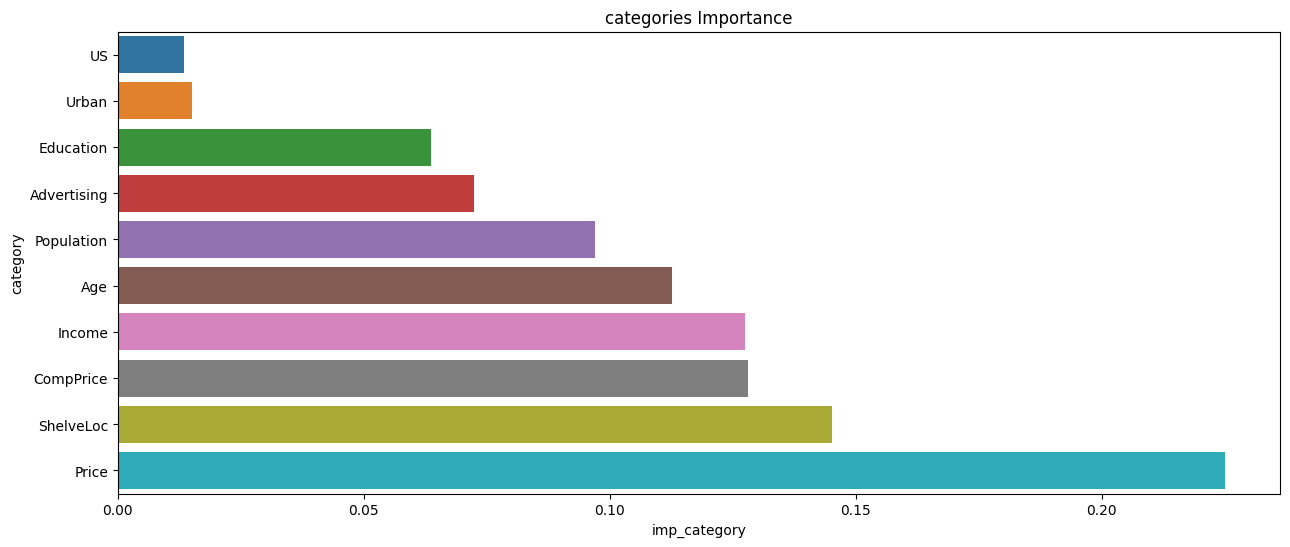

In [132]:
# plotting the important categories using barplot
plt.figure(figsize=(15,6))
plt.title('categories Importance')
sns.barplot(y='category', x='imp_category', data=data_gs)
plt.show()

In [133]:
selector=SelectFromModel(estimator=RandomForestClassifier())
selector.fit(x_train,y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [134]:
selector.get_support()

array([ True,  True, False,  True,  True,  True,  True, False, False,
       False])

In [135]:
length=len(x_train.columns)
length

10

In [136]:
column = x_train.columns[selector.get_support()]

In [137]:
len(column)

6

In [138]:
x_train_rf=selector.transform(x_train)
x_test_rf=selector.transform(x_test)

In [139]:
model_rf=RandomForestClassifier().fit(x_train_rf,y_train)
y_pred_imp=model_rf.predict(x_test_rf)

In [140]:
print(accuracy_score(y_test,y_pred_imp))
print(confusion_matrix(y_test,y_pred_imp))
RF_scores=accuracy_score(y_test,y_pred_imp)

0.6375
[[ 2  0  6]
 [ 0 15 14]
 [ 1  8 34]]


In [141]:
print(classification_report(y_test,y_pred_imp))

              precision    recall  f1-score   support

        high       0.67      0.25      0.36         8
         low       0.65      0.52      0.58        29
      medium       0.63      0.79      0.70        43

    accuracy                           0.64        80
   macro avg       0.65      0.52      0.55        80
weighted avg       0.64      0.64      0.62        80



In [142]:
imp_category=model_rf.feature_importances_
imp_category

array([0.16174765, 0.15218901, 0.14007906, 0.25554738, 0.15144404,
       0.13899287])

In [143]:
data_rf=pd.DataFrame({'category':column,'imp_category':imp_category})
data_rf=data_rf.sort_values('imp_category')

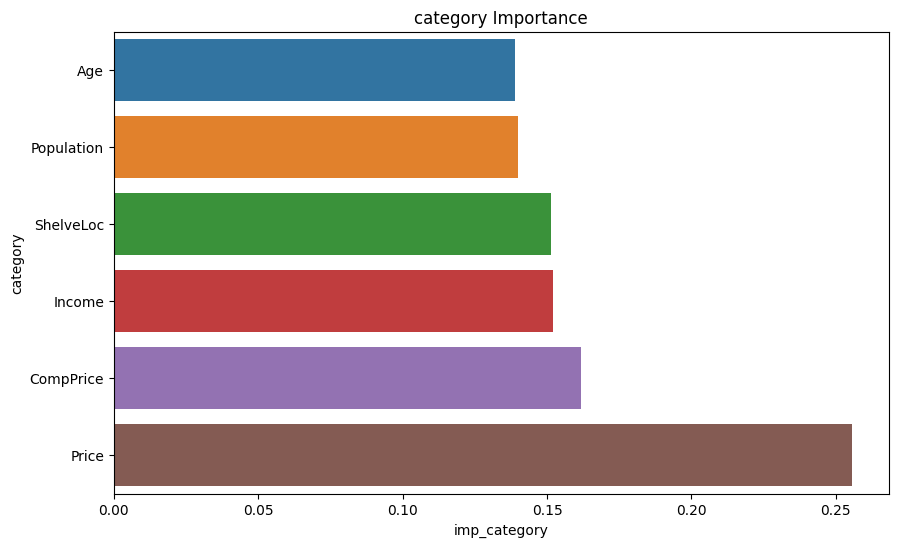

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('category Importance')
sns.barplot(y='category', x='imp_category', data=data_rf)
plt.show()

In [145]:
from sklearn.feature_selection import RFE
selector_rfe=RFE(RandomForestClassifier())
selector_rfe.fit(x_train,y_train)

RFE(estimator=RandomForestClassifier())

In [146]:
selector_rfe.get_support()

array([ True,  True, False, False,  True,  True,  True, False, False,
       False])

In [147]:
category_rfe=x_train.columns[selector_rfe.get_support()]
category_rfe

Index(['CompPrice', 'Income', 'Price', 'ShelveLoc', 'Age'], dtype='object')

In [148]:
len(x_train.columns[selector_rfe.get_support()])

5

In [149]:
x_train_rfe=selector_rfe.transform(x_train)
x_test_rfe=selector_rfe.transform(x_test)

In [150]:
model_rfe=RandomForestClassifier().fit(x_train_rfe,y_train)

In [151]:
y_pred_rfe=model_rfe.predict(x_test_rfe)

In [152]:
print(accuracy_score(y_test,y_pred_rfe))
print(confusion_matrix(y_test,y_pred_rfe))
RFE_scores=accuracy_score(y_test,y_pred_rfe)

0.625
[[ 1  0  7]
 [ 0 20  9]
 [ 1 13 29]]


In [153]:
print(classification_report(y_test,y_pred_rfe))

              precision    recall  f1-score   support

        high       0.50      0.12      0.20         8
         low       0.61      0.69      0.65        29
      medium       0.64      0.67      0.66        43

    accuracy                           0.62        80
   macro avg       0.58      0.50      0.50        80
weighted avg       0.62      0.62      0.61        80



In [154]:
imp_category_rfe=model_rfe.feature_importances_

In [155]:
data_rfe=pd.DataFrame({'category':category_rfe,'imp_category':imp_category_rfe})
data_rfe=data_rfe.sort_values('imp_category')

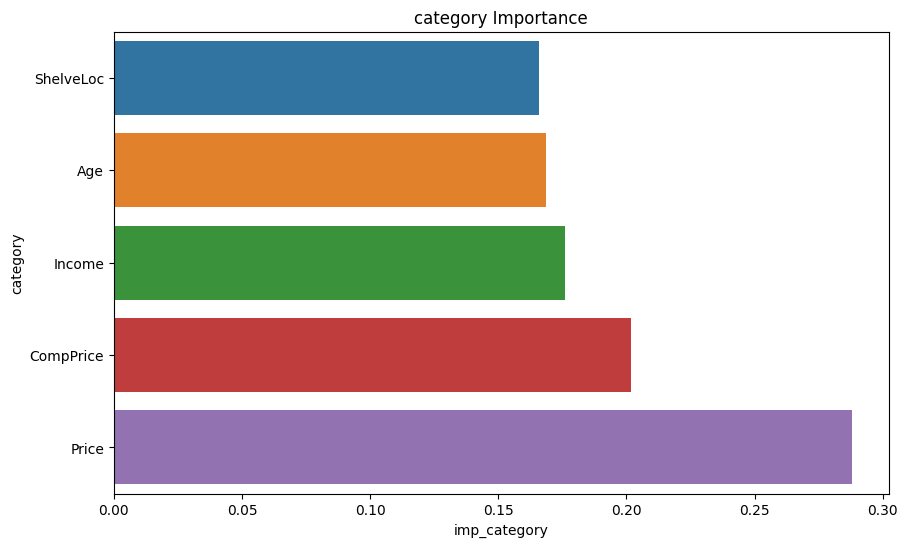

In [156]:
plt.figure(figsize=(10,6))
plt.title('category Importance')
sns.barplot(y='category', x='imp_category', data=data_rfe)
plt.show()

In [157]:
#make a table containing accuracy score value for each prepared model.
scores={'DT_models':['Grid Search','Random Forest',"Recurive Feature Elimination"],'Accuracy_scores':[GS_score,RF_scores,RFE_scores]}
table=pd.DataFrame(scores)
table

# using Grid search hyper parameter search has the highest accuracy scores but it also has the highest variables present in the data i.e 10
# from above graph we can see that these are the important categories that are having an impact on the sales
# price<population<Compprice<Age<Income.

,DT_models,Accuracy_scores
0,Grid Search,0.6750
1,Random Forest,0.6375
2,Recurive Feature Elimination,0.6250
